#IMPORTAÇÃO DAS BIBLIOTECAS E BASE DE DADO

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input

In [6]:
(x_train, _), (x_teste, _)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


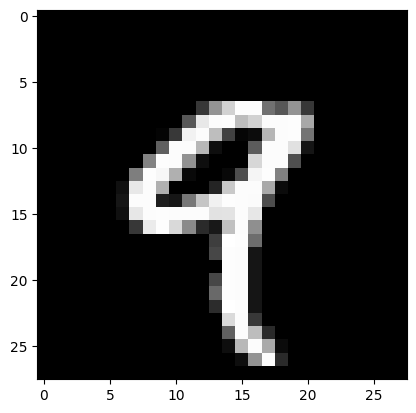

In [8]:
plt.imshow(x_train[4], cmap='gray')

#TRATAMENTO DOS DADOS

In [10]:
x_train = x_train.astype("float32") / 255.0
x_teste = x_teste.astype("float32") / 255.0

In [13]:
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_teste = x_teste.reshape(len(x_teste), np.prod(x_teste.shape[1:]))

In [17]:
x_train_noise = x_train + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)


In [19]:
x_teste_noise = x_teste + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=x_teste.shape)

In [20]:
x_train_noise = np.clip(x_train_noise,0.0,1.0)

In [21]:
x_teste_noise = np.clip(x_teste_noise,0.0,1.0)

#CRIAR OS AUTOENCODERS E TREINAR

In [24]:
inputs = Input(shape=(784,))
encoder = Dense(32, activation='relu')(inputs)
decoder = Dense(784, activation='sigmoid')(encoder)
autoencoder = Model(inputs, decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noise, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_teste_noise, x_teste))

Epoch 1/100
235/235 [==============================] - 6s 5ms/step - loss: 0.2816 - val_loss: 0.2159
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1998 - val_loss: 0.1842
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1750 - val_loss: 0.1656
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1605 - val_loss: 0.1537
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1507 - val_loss: 0.1459
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1434 - val_loss: 0.1393
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1385 - val_loss: 0.1356
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1355 - val_loss: 0.1333
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1335 - val_loss: 0.1319
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1324 - val_lo

In [28]:
idx = np.random.randint(x_teste.shape[0])
original_image = x_teste[idx]

noisy_image = original_image + 0.5 * np.random.normal(loc=0.0, scale=1.0, size=original_image.shape)
noisy_image = np.clip(noisy_image, 0.0, 1.0)

ruido = autoencoder.predict(np.expand_dims(noisy_image, axis=0))
ruido = ruido.reshape((28,28))


1/1 [==============================] - 0s 159ms/step


(-0.5, 27.5, 27.5, -0.5)

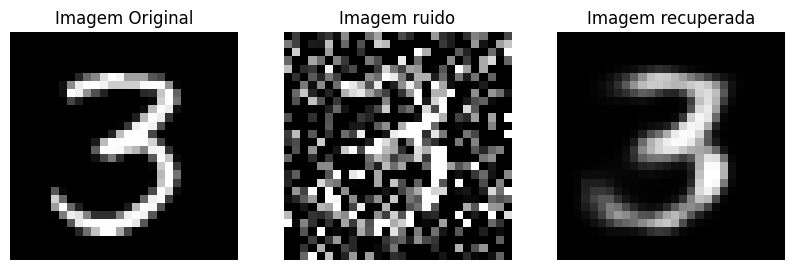

In [32]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(original_image.reshape(28,28), cmap='gray')
plt.title("Imagem Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(noisy_image.reshape(28,28), cmap='gray')
plt.title("Imagem ruido")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(ruido.reshape(28,28), cmap='gray')
plt.title("Imagem recuperada")
plt.axis("off")